In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

In [10]:
# ----------------------
# 1. Load Data
# ----------------------
DEFAULT_DATA_DIR = r"C:\Users\manoe.MC_ASUS\Documents\IRON HACK BOOTCAMP\DAFT_Feb 2025\labs\Week 5\5.1 lab-eda-univariate"

def load_data(file_name):
    """Load a dataset from the default directory and return it as a DataFrame."""
    file_path = os.path.join(DEFAULT_DATA_DIR, file_name)
    return pd.read_csv(file_path)


In [13]:
df_amz_uk = load_data("amz_uk_price_prediction_dataset.csv")
df_amz_uk.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?




In [66]:
df_amz_uk['category'].count()

2443651

In [64]:
most_frequent_category = df_amz_uk['category'].value_counts()
proportion_table = df_amz_uk['category'].value_counts(normalize=True)

print ("The most frequent category are:")
print (most_frequent_category.head())
print ("\nThe Proportion Table is:")
print (proportion_table.head())

The most frequent category are:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

The Proportion Table is:
category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Name: proportion, dtype: float64


In [55]:
df_categories = pd.DataFrame({
    'count' : most_frequent_category,
    'proportion' : proportion_table
})

df_categories.head(10)



,count,proportion
category,,
Sports & Outdoors,836265,0.342219
Beauty,19312,0.007903
"Handmade Clothing, Shoes & Accessories",19229,0.007869
Bath & Body,19092,0.007813
Birthday Gifts,18978,0.007766
Manicure & Pedicure Products,18940,0.007751
Skin Care,18769,0.007681
Make-up,18756,0.007675
Hair Care,18735,0.007667


2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

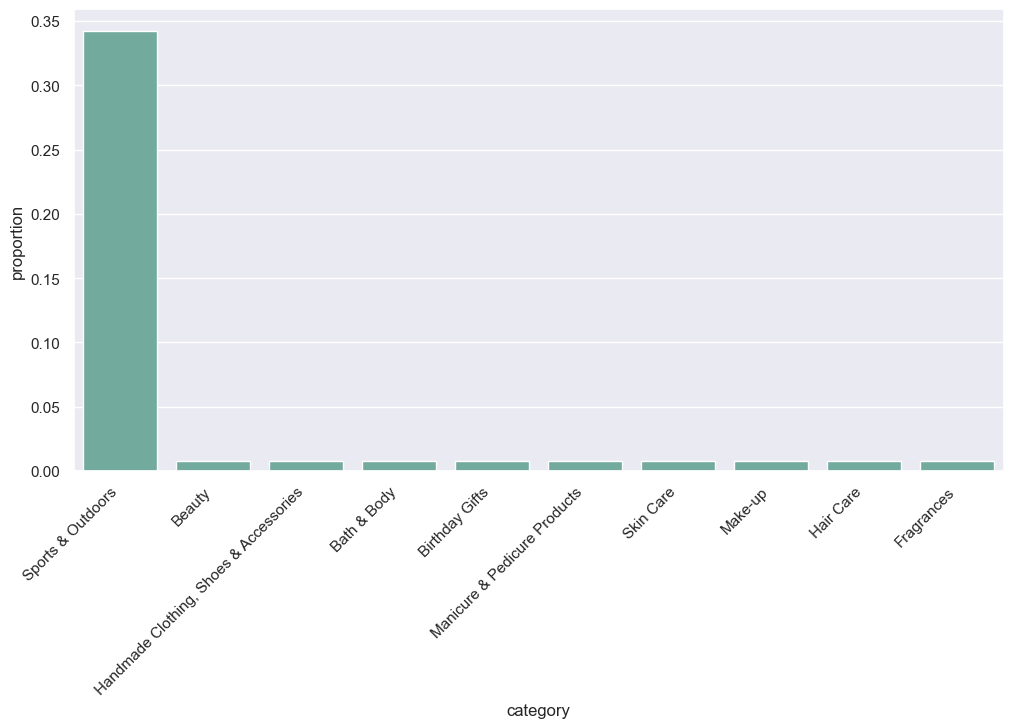

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt


top_n = 10 
df_top_categories = df_amz_uk['category'].value_counts(normalize=True).head(top_n).reset_index()
df_top_categories.columns = ['category', 'proportion']

# Set plot style
sns.set_theme(style="darkgrid")

# Set figure size
plt.figure(figsize=(12, 6))

# Plot bar chart for the top N categories
sns.barplot(
    x="category", 
    y="proportion", 
    data=df_top_categories,  
    color='#69b3a2'
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


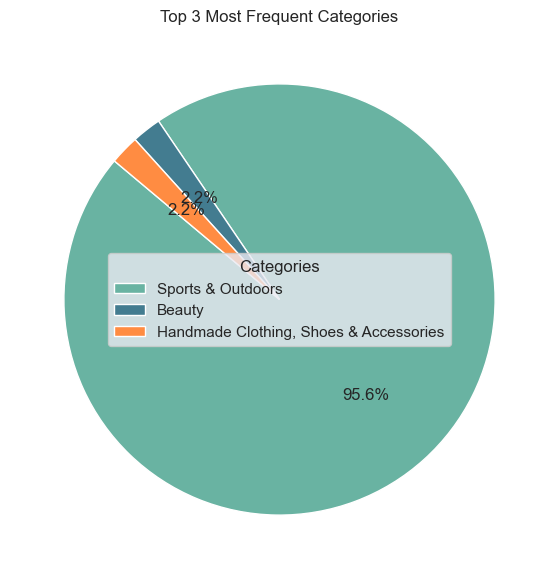

In [ ]:
import matplotlib.pyplot as plt

# Get the top 3 categories
top_n = 3
df_top_categories = df_amz_uk['category'].value_counts(normalize=True).head(top_n).reset_index()
df_top_categories.columns = ['category', 'proportion']

# Define colors
colors = ['#69b3a2', '#437c90', '#ff8c42']

# Create a pie chart
plt.figure(figsize=(7, 7))  # Adjust figure size
wedges, texts, autotexts = plt.pie(
    df_top_categories['proportion'],  
    labels=None,  # Remove direct labels for cleaner chart
    autopct='%1.1f%%',  
    colors=colors,  
    startangle=140,  
    wedgeprops={'edgecolor': 'white'}
)

# Add a legend on the right side
plt.legend(
    wedges, df_top_categories['category'], 
    title="Categories", loc="center left", 
    bbox_to_anchor=(1, 0.5)  # Moves the legend outside the chart
)

# Add title
plt.title("Top 3 Most Frequent Categories")

# Show plot
plt.show()
